<center><img src="https://matematica.usm.cl/wp-content/themes/dmatUSM/assets/img/logoDMAT2.png" title="Title text" width= 800 /></center>
<hr style="height:2px;border:none"/>

---

<h1 align='center'> Ayudantía 2: Modelos de Clasificación en Scikit-learn</h1>

<H3 align='center'> MAT281 2024-2 </H3>

<H3 align='center'> Ayud. Diego Astaburuaga C. </H3>

---

<hr style="height:2px;border:none"/>

En la ayudantía pasada se brindaron algunas métricas para poder iniciar o recordar como utilizar Python como lenguaje de programación. Algunas cosas quedaron en el tintero... y de momento ahí se quedaran. Para solventar esto, les recomiendo las [lecturas de Francisco Alfaro](https://github.com/fralfaro/MAT281_2024/tree/main/docs/lectures), especificamente, su [toolkit](https://github.com/fralfaro/MAT281_2024/tree/main/docs/lectures/toolkit) de [Github](https://github.com/fralfaro/MAT281_2024/blob/main/docs/lectures/toolkit/github.md), el cual recomiendo que empiecen a ocupar.

<img src="https://camo.githubusercontent.com/861945c125a95bee0e7792bbb75250a1dc9c4b2565b1ed8f15aa987b8d0dc438/68747470733a2f2f64726976652e676f6f676c652e636f6d2f75633f6578706f72743d766965772669643d31346872514e786466354f43597a5259737166683350674178475849345f494739" alt="scikit-learn logo" style="width:400px;height:200px;">

Para la primera parte de la ayudantía, revisaremos una [Introducción al Machine Learning](https://github.com/fralfaro/MAT281_2024/blob/main/docs/lectures/machine_learning/ml_intro.ipynb) realizada por Francisco Alfaro.
> ¿Qué debo saber para el curso?

Respuesta: Se espera saber identificar en que parte del entorno del Machine Learning se encuentran los contenidos que hemos visto hasta ahora.

## Recordemos los modelos de clasificación vistos en clases

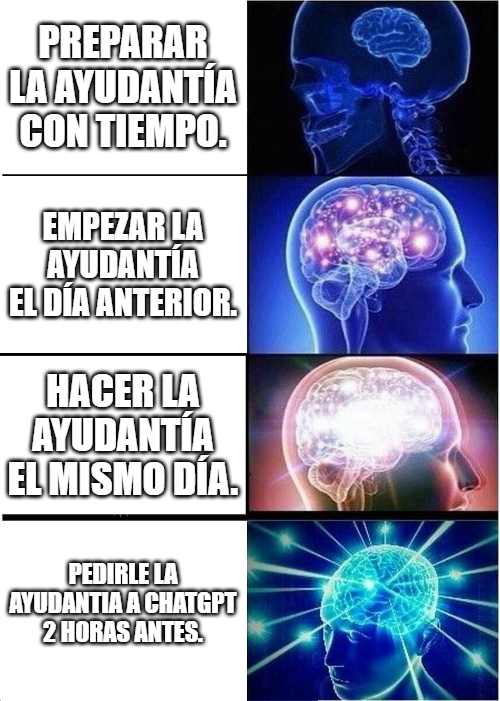

### Análisis discriminante

**Fórmula:**
La frontera de decisión se basa en:
$$
g_i(x) = x^T \Sigma^{-1} \mu_i - \frac{1}{2} \mu_i^T \Sigma^{-1} \mu_i + \log(\pi_i)
$$
donde $ \mu_i $ es la media de la clase $i$, $ \Sigma $ es la matriz de covarianzas, y $ \pi_i $ es la probabilidad a priori.

**Pros:**
- Rápido de entrenar y ejecutar.
- Funciona bien con datos normalmente distribuidos.

**Contras:**
- Supone normalidad y homocedasticidad.
- No es ideal si las clases no son linealmente separables.

---

### Regresión logística

**Fórmula:**
La probabilidad de la clase 1 está dada por:
$$
P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}
$$

**Pros:**
- Fácil de interpretar.
- Útil para problemas de clasificación binaria.

**Contras:**
- No captura relaciones no lineales entre características.
- Puede tener problemas con multicolinealidad.

---

### Naive-Bayes (Bayes ingenuo)

**Fórmula:**
El clasificador asigna la clase con mayor probabilidad a posteriori:
$$
P(y|x_1, x_2, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i|y)
$$

**Pros:**
- Muy rápido y eficiente.
- Funciona bien con datos de texto o problemas de clasificación multiclase.

**Contras:**
- Asume independencia total entre características (irreal en muchos casos).
- Sensible a características irrelevantes.

---

### Árboles de decisión

**Fórmula:**
Utiliza medidas como la ganancia de información o el índice Gini para seleccionar la mejor característica:
$$
\text{Ganancia de información} = I(\text{raíz}) - \sum_{i} p_i I(\text{nodo}_i)
$$

**Pros:**
- Fácil de interpretar y visualizar.
- No requiere normalización de datos.

**Contras:**
- Propenso a sobreajuste.
- Peor rendimiento con datos ruidosos o no lineales.

---

### KNN (k-nearest neighbors)

**Fórmula:**
Clasifica un nuevo punto $x$ según la mayoría de sus $k$ vecinos más cercanos:
$$
\text{Distancia euclidiana} = \sqrt{\sum_{i=1}^{n} (x_i - x'_i)^2}
$$

**Pros:**
- Simple de entender e implementar.
- No tiene suposiciones sobre la distribución de datos.

**Contras:**
- Computacionalmente costoso en grandes conjuntos de datos.
- Sensible a la escala de los datos.

---

### Support Vector Machines (SVM)

**Fórmula:**
Encuentra el hiperplano que maximiza el margen entre las clases:
$$
w^T x + b = 0
$$
donde $ w $ son los pesos y $ b $ el sesgo.

**Pros:**
- Eficiente en espacios de alta dimensionalidad.
- Resistente al sobreajuste en problemas no lineales con el uso de kernels.

**Contras:**
- Difícil de interpretar.
- No es adecuado para grandes conjuntos de datos debido a su costo computacional.

---

### Kernelización

**Fórmula:**
Proyecta los datos a un espacio de mayor dimensionalidad:
$$
K(x, x') = \phi(x)^T \phi(x')
$$
donde $ \phi $ es una función de transformación y $K $ es el kernel.

**Pros:**
- Permite clasificar datos no lineales.
- Funciona bien con un margen suave entre clases.

**Contras:**
- Elegir el kernel correcto puede ser complicado.
- Alto costo computacional.


## Sobre trabajar con datos

A continuación se presenta un resumen detallado de cómo trabajar en ciencia de datos, organizado de manera cronológica y cubriendo los puntos clave de cada etapa del proceso:

### 1. Definición del problema
El primer paso en un proyecto de ciencia de datos es entender el problema que quieres resolver. Define claramente el objetivo: ¿Estás buscando clasificar, predecir o segmentar datos? Esta etapa involucra:
- Entender el contexto del negocio o área.
- Formular preguntas específicas que los datos pueden ayudar a responder.
- Identificar las variables objetivo (dependiente) y las características (independientes).

### 2. Estadística descriptiva
Realiza un análisis exploratorio de los datos para obtener información inicial. Este paso incluye:
- Cálculo de medidas de tendencia central (media, mediana) y dispersión (varianza, desviación estándar).
- Identificación de valores atípicos o anomalías en los datos.
- Análisis de distribuciones y correlaciones entre variables.

### 3. Visualización descriptiva
Utiliza visualizaciones para comprender mejor los datos:
- **Histogramas y gráficos de barras:** para ver la distribución de variables numéricas y categóricas.
- **Gráficos de dispersión:** para observar la relación entre dos variables.
- **Mapas de calor:** para visualizar la correlación entre múltiples variables.
Estas visualizaciones ayudan a detectar patrones, relaciones o posibles problemas (datos faltantes, anomalías) que pueden influir en el modelo.

### 4. Preprocesamiento
Preparar los datos es clave para obtener buenos resultados con los modelos. Algunas técnicas incluyen:
- **División de datos:** separar el conjunto en **entrenamiento** y **prueba** (usualmente 70/30 o 80/20) para evaluar el rendimiento del modelo.
- **Manejo de datos faltantes:** imputación (relleno) o eliminación.
- **Codificación de variables categóricas:** convertir categorías en números usando técnicas como one-hot encoding.
- **Normalización/Estandarización:** escalar los datos para que todas las características estén en la misma escala, importante para algoritmos como SVM o KNN.

### 5. Selección de modelo
Aquí decides qué algoritmo usar dependiendo de la naturaleza del problema (clasificación, regresión, clustering, etc.):
- **Regresión logística, SVM, Árboles de decisión, Random Forest** para clasificación.
- **KNN, Redes neuronales, Naive-Bayes** para problemas de clasificación o regresión.
Selecciona un conjunto de modelos y compara su desempeño.

### 6. Entrenamiento del modelo y manejo de overfitting
Al entrenar el modelo, es crucial evitar el **overfitting** (cuando el modelo memoriza el conjunto de entrenamiento y falla en generalizar):
- **Cross-validation**: divide los datos de entrenamiento en diferentes subconjuntos para validar el modelo.
- **Regularización**: técnicas como L1 (Lasso) o L2 (Ridge) para reducir la complejidad del modelo.

### 7. Optimización de hiperparámetros
Una vez seleccionado el modelo, optimiza sus parámetros para mejorar el rendimiento. Técnicas comunes:
- **Grid Search**: prueba de forma exhaustiva diferentes combinaciones de parámetros.
- **Random Search**: selecciona aleatoriamente combinaciones de hiperparámetros.
- **Bayesian Optimization**: método más avanzado para encontrar los mejores hiperparámetros de manera más eficiente.

### 8. Métricas y análisis de resultados
Después de entrenar el modelo, evalúa su rendimiento con métricas apropiadas:
- **Matriz de confusión**: para problemas de clasificación, muestra la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.
- **Curva ROC/AUC**: mide el rendimiento de un clasificador, donde un área bajo la curva (AUC) cercana a 1 indica un buen modelo.
- **Precisión, recall y F1-score**: útiles cuando las clases están desbalanceadas.

### 9. Visualizaciones del modelo
Genera visualizaciones para interpretar el modelo y sus resultados:
- **Curvas ROC y AUC** para entender el rendimiento.
- **Feature importance** en modelos como Random Forest para identificar las variables más influyentes.
- **Gráficos de dispersión con fronteras de decisión** en modelos como SVM para visualizar cómo el modelo clasifica los datos.

### 10. Conclusiones
Finalmente, resume los hallazgos clave y la efectividad del modelo:
- **¿El modelo resuelve el problema definido?**
- **¿Qué limitaciones tiene?** (overfitting, clases desbalanceadas, etc.)
- **¿Cómo podría mejorar?**
Además, discute el impacto de los resultados y los próximos pasos: ¿Se necesita más recolección de datos? ¿Se deben ajustar más los modelos?

Este flujo de trabajo te permitirá estructurar y abordar un proyecto de ciencia de datos de manera eficiente, desde la comprensión inicial hasta las conclusiones basadas en resultados cuantitativos.

## Mucho relleno, vamos a poner en mesa lo que sabemos

Veamos los pasos anteriores y contenidos en un problema "real". Primero importemos las librerías y funciones necesarias.

In [6]:
# ESTO NOOOOOOO
# pip install sklearn

In [7]:
# pip install scikit-learn

In [9]:
# Manejo de datos
import numpy as np
import pandas as pd

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import mutual_info_classif # Mutual information classification


### 1. Definición del problema

El problema a presentar se trata de encontrar un algoritmo de clasificación que examine las características de cada hongo del conjunto de datos y aprenda los patrones que le permitan decidir si dicho hongo es comestible o venenoso. Existen diversos enfoques para esto, en esta oportunidad pondremos a prueba los modelos que conocemos sobre este problema.

Este problema se enmarca en un contexto de clasificación, el cual es muy útil en muchas áreas, como la medicina, la banca, el comercio electrónico y la publicidad, ya que permite la automatización de tareas que antes requerían una gran cantidad de tiempo y recursos humanos.



<img src="https://camo.githubusercontent.com/611a8df703229023563453a0dec5a13f389741b38b53f8a52ecc9572155a0d57/68747470733a2f2f77302e7065616b70782e636f6d2f77616c6c70617065722f3439362f3539352f48442d77616c6c70617065722d7265642d6d757368726f6f6d2d6d757368726f6f6d2d7265642d62656175746966756c2e6a7067" alt="hongo" style="width:600px;height:500px;">

Este conjunto de datos incluye descripciones de muestras correspondientes a 23 especies de hongos de la familia Agaricus y Hongo Lepiota extraídas de la Guía de campo de hongos norteamericanos de la Audubon Society. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se ha combinado con la venenosa.

Cargamos el conjunto de datos

In [10]:
data_mush = pd.read_csv('../datasets/mushrooms.csv')

Revisemos el conjunto de datos

In [11]:
print("Total Rows and Columns in DataFrame is :", data_mush.shape,"\n") 

data_mush

Total Rows and Columns in DataFrame is : (8124, 23) 



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Creamos una función de apoyo para verificar los datos faltantes, nulos o repetidos que pueda tener el conjunto de datos.

In [12]:
def datainfo():
    """"Obtain the info about the dataframe data_mush"""
    temp_ps = pd.DataFrame(index=data_mush.columns)
    temp_ps['DataType'] = data_mush.dtypes
    temp_ps["Non-null_Values"] = data_mush.count()
    temp_ps['Unique_Values'] = data_mush.nunique()
    temp_ps['NaN_Values'] = data_mush.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data_mush))*100 
    return temp_ps

info = datainfo()
info

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
class,object,8124,2,0,0.0
cap-shape,object,8124,6,0,0.0
cap-surface,object,8124,4,0,0.0
cap-color,object,8124,10,0,0.0
bruises,object,8124,2,0,0.0
odor,object,8124,9,0,0.0
gill-attachment,object,8124,2,0,0.0
gill-spacing,object,8124,2,0,0.0
gill-size,object,8124,2,0,0.0
gill-color,object,8124,12,0,0.0


Notamos que no faltan datos y que no hay incongruencias en ellos (no hay NaN). Además, todas las columnas presentes en la data son variables categóricas y estamos en presencia de 6 variables binarias, donde una de ellas es nuestro taget 'class'. Esto último se afirma estudiando el dataset original y notando que las otras categorías binarias corresponden a otras características del Hongo como la forma del tallo o si tiene moretones ("bruises").

> Nota: La mayor parte del contenido mostrado corresponde a una parte de una tarea realizada para el curso de Introducción al aprendizaje automático. El trabajo fue realizado en equipo junto con mis compañeros Dominique y David.

### 2. Estadística descriptiva

No tenemos variables númericas, nos saltamos esto.

### 3. Visualización descriptiva (Manipulación y exploración del conjunto de datos)

Notemos que existe una columna que no aporta:

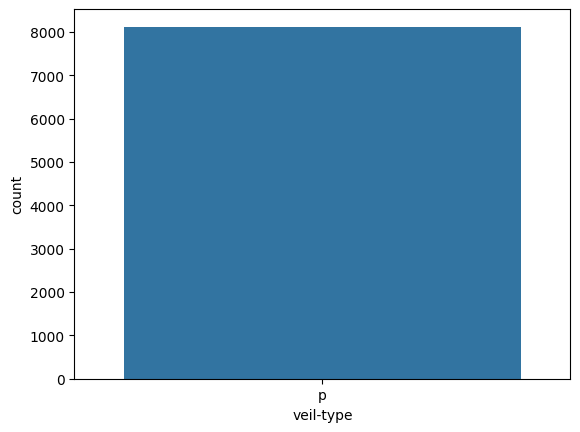

In [13]:
sns.countplot(x="veil-type", data=data_mush);

In [14]:
data_mush.drop('veil-type', axis=1, inplace=True) # Se elimina la columna mencionada
data_mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


Veamos el histograma de cada columna

C:\Users\diego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


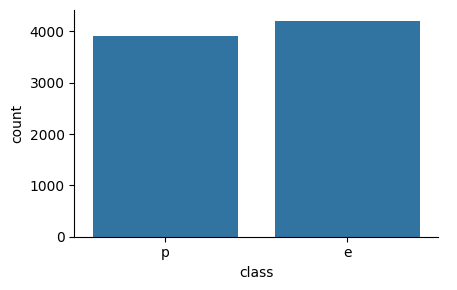

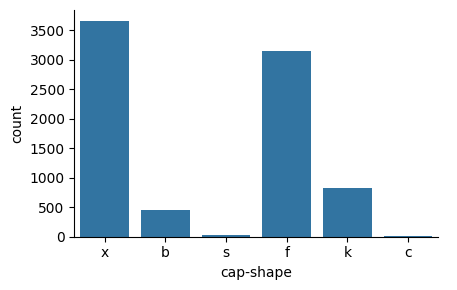

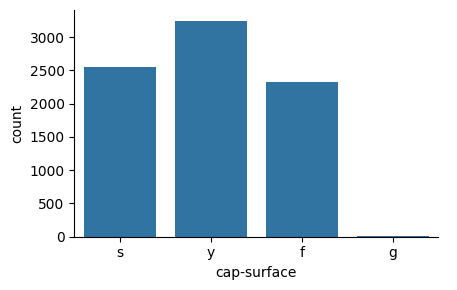

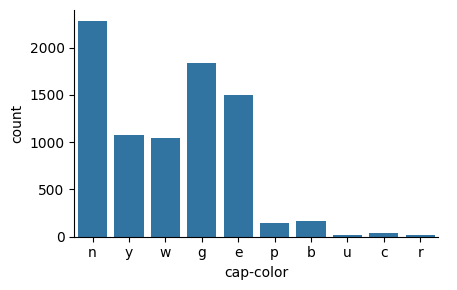

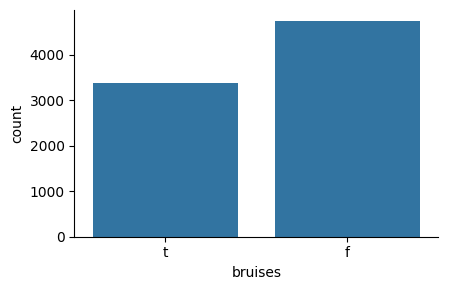

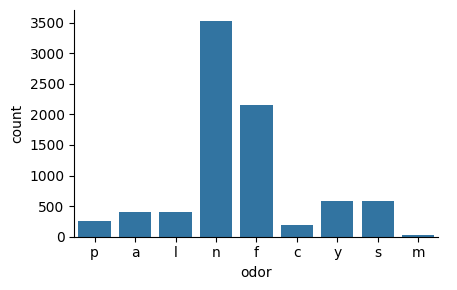

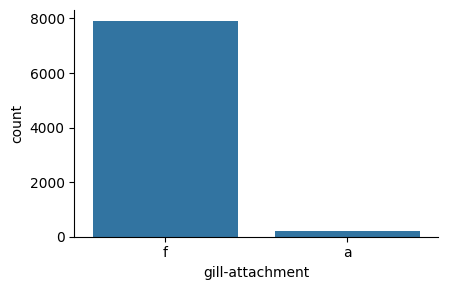

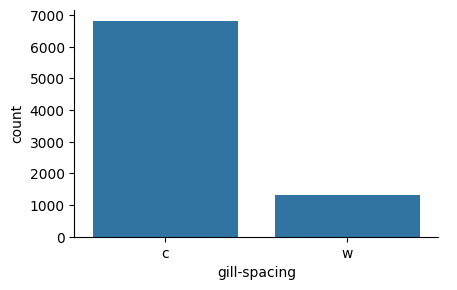

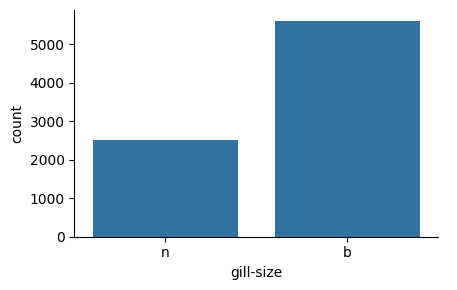

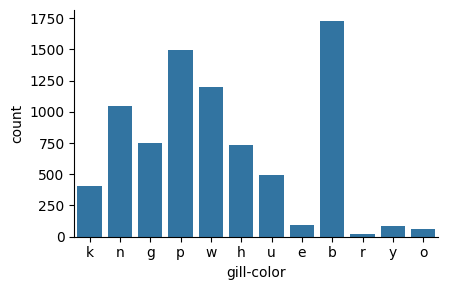

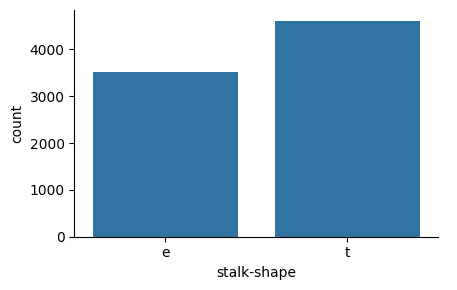

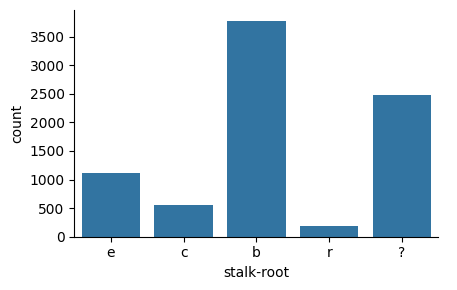

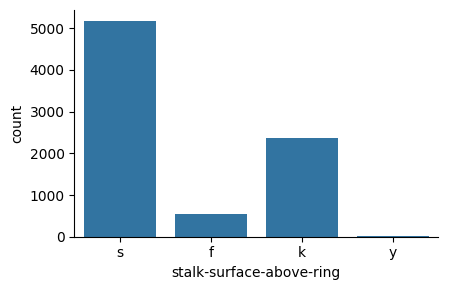

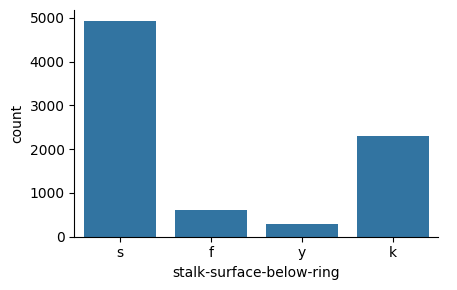

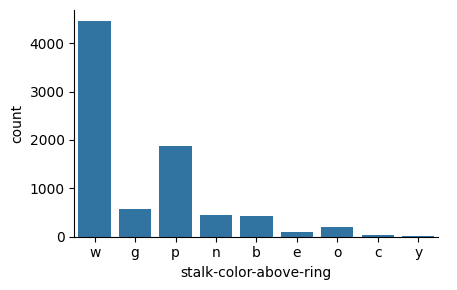

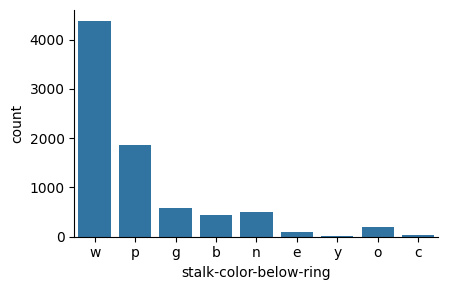

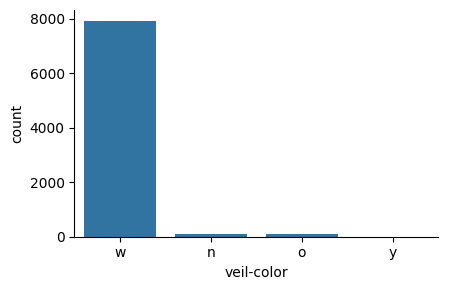

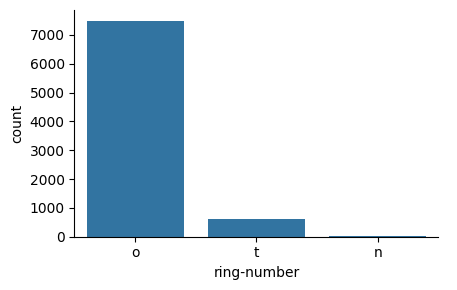

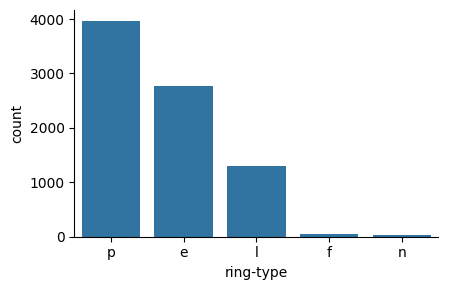

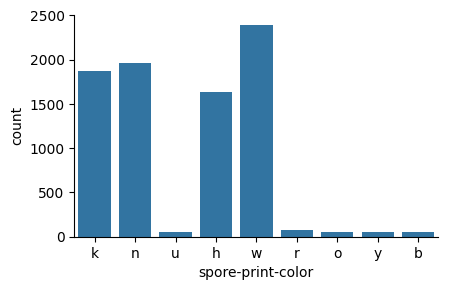

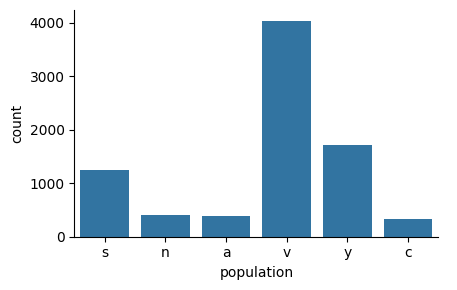

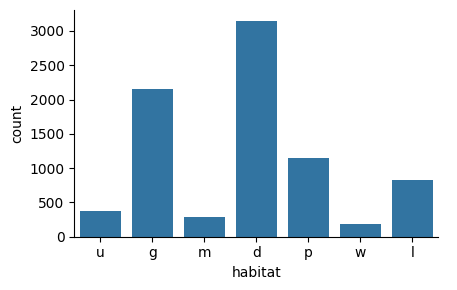

In [15]:
for col in data_mush.columns:    
    sns.catplot(x=col, kind="count", data=data_mush, height=3, aspect=1.5);

### 4. Preprocesamiento


Se tiene que dejar algo bien en claro en este momento:

<span style="color:red; font-size:2em;">El conjunto de prueba no se toca.</span>

Es decir, todas las transformaciones de variables y tratamiento de filas debe ser realizado sobre el conjunto de entrenamiento.

**Concepto de Stratify**

In [16]:
train_set, test_set = train_test_split(data_mush, test_size=0.2, shuffle=True, stratify=None, random_state=42)

# Shape of the data.
print("Total Rows and Columns in train set is :", train_set.shape) 
print("Total Rows and Columns in test set is :", test_set.shape) 

train_set.head()

Total Rows and Columns in train set is : (6499, 22)
Total Rows and Columns in test set is : (1625, 22)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,p,k,s,e,f,s,f,c,n,b,...,s,k,p,w,w,o,e,w,v,d
6515,p,x,s,n,f,f,f,c,n,b,...,k,s,w,w,w,o,e,w,v,p
6141,p,f,y,e,f,y,f,c,n,b,...,s,s,p,w,w,o,e,w,v,l
2764,e,f,f,n,t,n,f,c,b,u,...,s,s,g,p,w,o,p,n,v,d
438,e,b,y,y,t,l,f,c,b,k,...,s,s,w,w,w,o,p,n,n,m


**Concepto de One Hot Enconder** y el problema de tener variables categoricas.

In [28]:
# Crea una instancia de LabelBinarizer
lb = LabelBinarizer()

# create a list to store the columns to be dropped
drop_cols = []

# iterate over columns and check for binary variables
for col in train_set.columns:
    if len(train_set[col].unique()) == 2:
        # convert binary variables to 0/1
        if col == 'class':
            # mapear 'e' a 0 y 'p' a 1
            train_set[col] = train_set[col].replace({'e': 0, 'p': 1})
            test_set[col] = test_set[col].replace({'e': 0, 'p': 1})
        else:
            # Transforma las columnas 1 y 3 de X_train en binario
            train_set[col] = lb.fit_transform(train_set[col])
            # Transforma las mismas columnas en X_test
            test_set[col] = lb.transform(test_set[col])
    else:
        # get dummies for categorical variables with more than 2 categories
        train_set = pd.concat([train_set, pd.get_dummies(train_set[col], prefix=col)], axis=1)
        test_set = pd.concat([test_set, pd.get_dummies(test_set[col], prefix=col)], axis=1)
        # add the original column to the list of columns to be dropped
        drop_cols.append(col)

# drop the original categorical columns from the train and test sets
train_set.drop(drop_cols, axis=1, inplace=True)
test_set.drop(drop_cols, axis=1, inplace=True)

# ensure that the train and test sets have the same columns
train_set, test_set = train_set.align(test_set, join='outer', axis=1, fill_value=0)

# print the shapes of the train and test sets
print('Train set shape:', train_set.shape)
print('Test set shape:', test_set.shape)

train_set

Train set shape: (6499, 112)
Test set shape: (1625, 112)


,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7873,1,0,1,0,1,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
6515,1,0,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6141,1,0,1,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2764,0,1,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
438,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,1,0,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5390,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
860,0,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
7603,1,0,1,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


Separemos la variable objetivo de las covariables predictoras.

In [29]:
X_train = train_set.drop('class',axis=1)
y_train = train_set['class']

X_test = test_set.drop('class',axis=1)
y_test = test_set['class']

Verifiquemos que todo este en orden.

In [30]:
# Shape of the data.
print("Total Rows and Columns in X_train is :", X_train.shape) 
print("Total Rows and Columns in y_train is :", y_train.shape,"\n") 

X_train.head()

Total Rows and Columns in X_train is : (6499, 111)
Total Rows and Columns in y_train is : (6499,) 



,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7873,0,1,0,1,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
6515,0,1,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6141,0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2764,1,1,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
438,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### 4.5 Preprocesamiento (Feature Engineering)

Hagamos una pequeña pausa para comentar algunas consideraciones respecto al procesamiento de las covariables o _features_:
1. **Escalado de datos**: Ajusta los valores a la misma escala, esencial para algoritmos sensibles a magnitudes como SVM y KNN.

2. **Codificación categórica**: Transforma variables categóricas en números mediante Label o One-Hot Encoding para usar en modelos de machine learning.

3. **Reducción de dimensionalidad (PCA)**: Simplifica el conjunto de datos manteniendo las variables más relevantes, reduciendo ruido y riesgo de overfitting.

4. **Imputación de datos faltantes**: Completa valores perdidos con la media, mediana o modelos, evitando perder información valiosa.

5. **Selección de características**: Identifica y elimina variables irrelevantes para mejorar rendimiento, reducir overfitting y optimizar el entrenamiento del modelo.

Mas info en el [siguiente link](https://scikit-learn.org/stable/modules/preprocessing.html).

Para simplificar, escogeremos una forma sencilla de reducir la cantidad de variables, seguramente no sea óptima, pero sirve para el ejemplo. Para esto considere la [información mutua](https://es.wikipedia.org/wiki/Información_mutua) para $n-k$ covariables, esto es, las $n-k$ covariables más informativas respecto a la variable objetivo (con $n$ el total de covariables y $k$ el número a fijar de menos informativas).

In [31]:
mi = mutual_info_classif(X_train, y_train)
len(mi)

111

In [32]:
# get the indices of the features sorted by mutual information score
sorted_indices = np.argsort(mi)

k=96
n_features = X_train.shape[1]

# compute the number of features to select
n = n_features - k

# select the top n features
selected_indices = sorted_indices[-n:]

# create the new dataset
X_train_mi= X_train.iloc[:,selected_indices]
X_test_mi = X_test.iloc[:,selected_indices]

print(f'number of new features with k = {k}: {X_train_mi.shape[1]}')

number of new features with k = 96: 15


> Acabamos de cambiar el conjunto de prueba ¿No se supone que no se toca?

### 5. Selección de modelo

In [33]:
# Sobre la selección de modelos
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# Modelos
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # analisis discriminante
from sklearn.linear_model import LogisticRegression # regresion logisitica
from sklearn.naive_bayes import GaussianNB # naive bayes gaussiano
from sklearn.tree import DecisionTreeClassifier # arboles de decision
from sklearn.neighbors import KNeighborsClassifier # knn
from sklearn.svm import SVC # maquinas de vectores de soporte

# Sobre las métricas de los modelos
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [34]:
X_train_mi

,spore-print-color_k,spore-print-color_n,stalk-surface-below-ring_s,population_v,spore-print-color_h,stalk-surface-above-ring_s,ring-type_l,bruises,ring-type_p,gill-size,stalk-surface-below-ring_k,gill-color_b,stalk-surface-above-ring_k,odor_f,odor_n
7873,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0
6515,0,0,1,1,0,0,0,0,0,1,0,1,1,1,0
6141,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0
2764,0,1,1,1,0,1,0,1,1,0,0,0,0,0,1
438,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0,0,1,1,0,0,0,0,0,1,0,1,1,1,0
5390,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
860,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
7603,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0


In [35]:
X_test_mi

,spore-print-color_k,spore-print-color_n,stalk-surface-below-ring_s,population_v,spore-print-color_h,stalk-surface-above-ring_s,ring-type_l,bruises,ring-type_p,gill-size,stalk-surface-below-ring_k,gill-color_b,stalk-surface-above-ring_k,odor_f,odor_n
1971,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
6654,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0
5606,0,0,1,1,0,0,0,0,0,1,0,1,1,1,0
3332,0,1,1,0,0,1,0,1,1,0,0,0,0,0,1
6988,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7374,0,0,1,1,0,0,0,0,0,1,0,1,1,1,0
1149,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4999,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0
7497,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0


In [36]:
# Diccionario para almacenar los modelos
modelos = {
    "Análisis Discriminante": LinearDiscriminantAnalysis(),
    "Regresión Logística": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine (SVM)": SVC(kernel='linear', probability=True)
}

### 5.1 Matriz de Confusión: Break de recuerdo

La **matriz de confusión** es una herramienta que evalúa el desempeño de un modelo de clasificación. Se organiza como una tabla que compara las predicciones del modelo con las etiquetas reales. La matriz se ve de la siguiente manera:

|                | Predicción Positiva | Predicción Negativa |
|----------------|---------------------|---------------------|
| **Clase Positiva** | Verdaderos Positivos (TP) | Falsos Negativos (FN) |
| **Clase Negativa** | Falsos Positivos (FP)      | Verdaderos Negativos (TN) |

#### Fórmulas importantes:

1. **Precisión (Accuracy)**: Proporción de predicciones correctas sobre el total de predicciones.
   $$
   \text{Precisión} = \frac{TP + TN}{TP + TN + FP + FN}
   $$

2. **Precisión (Precision)**: Proporción de verdaderos positivos sobre todas las predicciones positivas.
   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$

3. **Exhaustividad (Recall o Sensibilidad)**: Proporción de verdaderos positivos sobre todos los casos reales positivos.
   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$

4. **Puntaje F1 (F1-Score)**: Media armónica entre la precisión y el recall.
   $$
   F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

5. **Especificidad**: Proporción de verdaderos negativos sobre todos los casos reales negativos.
   $$
   \text{Especificidad} = \frac{TN}{TN + FP}
   $$

6. **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**: Mide la capacidad del modelo para distinguir entre clases. Un valor cercano a 1 indica un buen desempeño.

#### Ejemplo de matriz de confusión:

|                | Predicción Positiva | Predicción Negativa |
|----------------|---------------------|---------------------|
| **Clase Positiva** | 50                  | 10                  |
| **Clase Negativa** | 5                   | 100                 |

#### Métricas calculadas:

- **Precisión (Accuracy)**: 
  $$
  \frac{50 + 100}{50 + 100 + 5 + 10} = 0.93 \text{ (93\%)}
  $$

- **Precisión (Precision)**: 
  $$
  \frac{50}{50 + 5} = 0.91 \text{ (91\%)}
  $$

- **Exhaustividad (Recall)**: 
  $$
  \frac{50}{50 + 10} = 0.83 \text{ (83\%)}
  $$

- **Especificidad**: 
  $$
  \frac{100}{100 + 5} = 0.95 \text{ (95\%)}
  $$

- **F1-Score**: 
  $$
  2 \cdot \frac{0.91 \cdot 0.83}{0.91 + 0.83} = 0.87 \text{ (87\%)}
  $$

### Interpretación:
- **Precisión** evalúa cuántas predicciones fueron correctas en general.
- **Precision** y **recall** se enfocan en las predicciones positivas, importantes en casos de desbalanceo.
- **F1-Score** es útil cuando se necesita un balance entre precisión y recall.
- **Especificidad** se centra en las predicciones correctas de la clase negativa.

Estas métricas ayudan a evaluar de manera completa el rendimiento de un modelo de clasificación.

In [37]:
def cla_report(y_test,y_pred):
    #Resume the function classification_report(...)
    return classification_report(y_test.tolist(), y_pred, target_names = ['edible', 'poisonous'])

# Entrenar y evaluar cada modelo
for nombre, modelo in modelos.items():
    # Entrenar el modelo
    modelo.fit(X_train_mi, y_train)
    
    # Predecir sobre el conjunto de prueba
    y_pred = modelo.predict(X_test_mi)
    y_proba = modelo.predict_proba(X_test_mi)[:, 1] if hasattr(modelo, 'predict_proba') else None
    
    # Calcular métricas
    print(f"\nModelo: {nombre}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names = ['edible', 'poisonous']))
    print(cla_report(y_test, y_pred), sep="\n")
    
    if y_proba is not None:
        roc_auc = roc_auc_score(y_test, y_proba)
        print(f"ROC AUC Score: {roc_auc:.4f}")
        
    print(f"\n\n")


Modelo: Análisis Discriminante
Confusion Matrix:
[[794  49]
 [ 20 762]]
Classification Report:
              precision    recall  f1-score   support

      edible       0.98      0.94      0.96       843
   poisonous       0.94      0.97      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

              precision    recall  f1-score   support

      edible       0.98      0.94      0.96       843
   poisonous       0.94      0.97      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

ROC AUC Score: 0.9886




Modelo: Regresión Logística
Confusion Matrix:
[[808  35]
 [ 16 766]]
Classification Report:
              precision    recall  f1-score   support

      edible       0.98      0.96      0.97       843
   poisonous       0.96

Idealmente al programar, ojala no entrenar el modelo cada vez que lo quieras utilizar, por ende se recomienda como ejercicio ver el código anterior y buscar la forma de almacenar los modelos ya creados de forma que si queremos realizar predicciones o estudiar los modelos, no tengamos que volver a entrenarlos (ni obviamente hacerlo 1 por 1).


Modelo: Análisis Discriminante
Confusion Matrix:
Error tipo 1: 0.058
Error tipo 2: 0.026


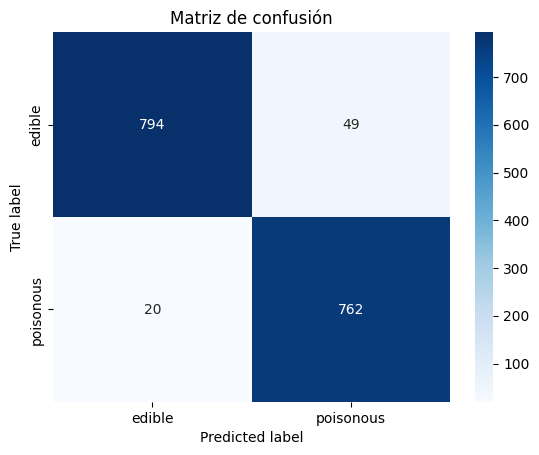

None

Modelo: Regresión Logística
Confusion Matrix:
Error tipo 1: 0.042
Error tipo 2: 0.02


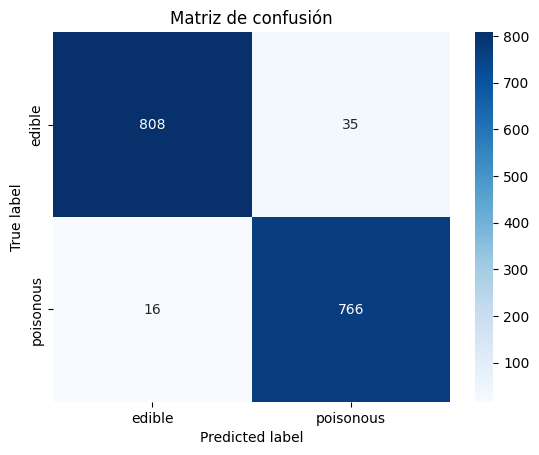

None

Modelo: Naive Bayes
Confusion Matrix:
Error tipo 1: 0.012
Error tipo 2: 0.159


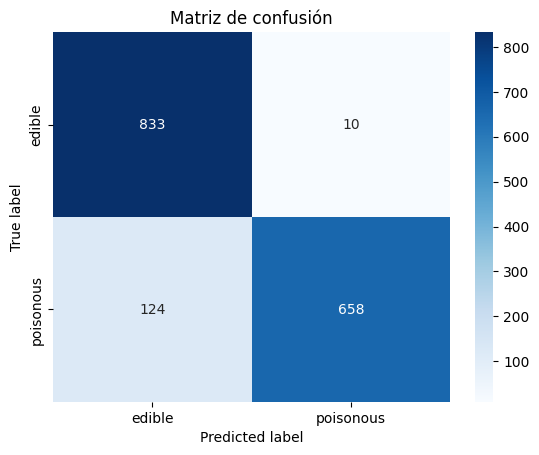

None

Modelo: Árbol de Decisión
Confusion Matrix:
Error tipo 1: 0.019
Error tipo 2: 0.0


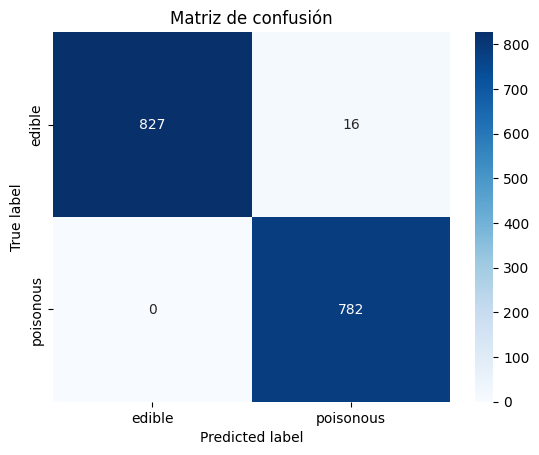

None

Modelo: K-Nearest Neighbors
Confusion Matrix:
Error tipo 1: 0.019
Error tipo 2: 0.0


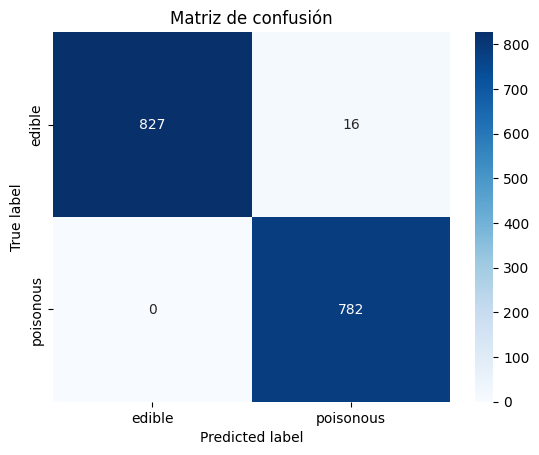

None

Modelo: Support Vector Machine (SVM)
Confusion Matrix:
Error tipo 1: 0.039
Error tipo 2: 0.019


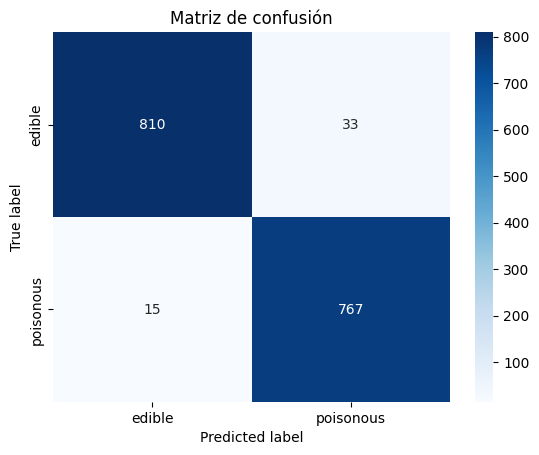

None


In [38]:
# Función para mostrar matriz de confusión y así el error tipo 1 y tipo 2.
def plot_cm(y_test, y_pred):
    # Calcula la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Calcula los errores tipo 1 y tipo 2
    false_positive_rate = cm[0, 1] / np.sum(cm[0])
    false_negative_rate = cm[1, 0] / np.sum(cm[1])

    # Imprime los errores tipo 1 y tipo 2
    print('Error tipo 1:', round(false_positive_rate,3))
    print('Error tipo 2:', round(false_negative_rate,3))

    # Define los nombres de las clases
    class_names = ['edible', 'poisonous']

    # Crea el heatmap con los números
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='d', xticklabels=class_names, yticklabels=class_names)
    
    plt.title('Matriz de confusión')

    # Ajusta las etiquetas del eje
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    
# Entrenar y evaluar cada modelo
for nombre, modelo in modelos.items():
    # Entrenar el modelo
    modelo.fit(X_train_mi, y_train)
    
    # Predecir sobre el conjunto de prueba
    y_pred = modelo.predict(X_test_mi)    
    # Calcular métricas
    print(f"\nModelo: {nombre}")
    print("Confusion Matrix:")
    print(plot_cm(y_test, y_pred))

### 6... Pendiente...

Sientanse libre de preguntar como proseguir, pero creo que de momento la ayudantía llega hasta aqui. Para guiarlos en su aprendizaje, pueden realizar la siguiente actividad.

## Actividad.

1) Investige para que son y para que sirven los siguientes conceptos:
    - Optimización de hiperparametros (spoiler: Gridsearch)
    - Opciones del método .fit. Por ejemplo, si model = DecisionTreeClassifier(), entonces ver las opciones de model.fit(...).
        - Ojo con los algoritmos de optimización.
    - Penalizaciones: L1, L2 y ElasticNet
    - PCA.
    - Crossvalidation.
    - Overfitting.
2) Eliga dos modelos a interés e intente implementar lo siguiente en el conjunto de datos:
    - CrossValidation.
    - Selección de modelos según distintas métricas.
    - Métricas de desempeño en el training set vs las métricas para el test set.

3) Responda o medite las siguientes preguntas:
    - **Para este conjunto de datos**, que prefiere ¿máximizar __precision__?, ¿máximizar __recall__? o da igual. Discuta.
    - ¿Prefiero un modelo muy complejo pero que da buenos resultados (en el test set)? ¿o prefiero un modelo con menos "precisión" pero con más interpretabilidad?
    - ¿Que tanto usó Chatgpt el ayudante?
    - Se viene el 18.

## Otros ejemplos para revisar:

- [Proyecto final del ayudante del año pasado](https://github.com/Diego-Astaburuaga/Proyecto-Final-MAT281/blob/main/main.ipynb).
- La tarea subida por el profesor al Aula. Ahí pueden observar un ejemplo pero para casos con covariables continuas.
    - Links secretos [Primera tarea](https://github.com/Diego-Astaburuaga/Tarea-1-MAT281/blob/main/Tarea_1_MAT281_Astaburuaga.pdf), [Segunda tarea](https://github.com/Diego-Astaburuaga/Tarea-2-MAT281/blob/main/Tarea_2_MAT281_Astaburuaga.pdf) (creo que los tengo en privado).

## Referencias
- [Introducción a ML por Francisco Alfaro](https://github.com/fralfaro/MAT281_2024/blob/main/docs/lectures/machine_learning/ml_intro.ipynb).
- [Ayudantía 7 Alejandro de scikit-learn](https://github.com/AlejandroVillazonG/ayudantias_MAT281/blob/main/ayudantias_2023/Ayud7_MAT281_sklearn_1.ipynb).
- [Code extras Alejandro: Regresión logística, Naive Bayes y Árbol de Clasificación](https://github.com/AlejandroVillazonG/ayudantias_MAT281/blob/main/extras/extras_t1.ipynb).
- [Code extras Alejandro: SVM y K-Nearest Neighbors](https://github.com/AlejandroVillazonG/ayudantias_MAT281/blob/main/extras/extras_t2.ipynb).
- [Sobre Overfitting by Francisco Alfaro, parte I](https://github.com/fralfaro/MAT281_2024/blob/main/docs/lectures/machine_learning/over_01.ipynb).
- [Sobre Overfitting by Francisco Alfaro, parte II](https://github.com/fralfaro/MAT281_2024/blob/main/docs/lectures/machine_learning/over_02.ipynb).
- [Página oficial de scikit-learn](https://scikit-learn.org/stable/).